In [82]:
from imp import reload
import sys
import cooler
sys.path.append('/Users/yuanzan/Documents/github/seqyuan/trackc/src/')
from trackc import structure_mark
from trackc import mapc
reload(structure_mark)
reload(mapc)

BxPC3_chr18_50k = cooler.Cooler('/Users/yuanzan/Documents/github/seqyuan/trackc_data/BxPC3.chr18.mcool::/resolutions/50000')
HPDE6C7_chr18_50k = cooler.Cooler('/Users/yuanzan/Documents/github/seqyuan/trackc_data/HPDE6C7.chr18.mcool::/resolutions/50000')

cnorml = mapc._getRegionsCmat.extractContactRegions(clr=HPDE6C7_chr18_50k, row_regions="18:45000000-78077248")
ctumor = mapc._getRegionsCmat.extractContactRegions(clr=BxPC3_chr18_50k, row_regions="18:45000000-78077248")


In [81]:
BxPC3_chr18_50k.chromsizes

name
1     249250621
2     243199373
3     198022430
4     191154276
5     180915260
6     171115067
7     159138663
8     146364022
9     141213431
10    135534747
11    135006516
12    133851895
13    115169878
14    107349540
15    102531392
16     90354753
17     81195210
18     78077248
19     59128983
20     63025520
21     48129895
22     51304566
X     155270560
Name: length, dtype: int32

In [2]:
import pandas as pd
import numpy as np
import os,sys
import seaborn as sns
import matplotlib.pyplot as plt
import anndata as ad
import matplotlib.patches as mpatches

import matplotlib as mpl

In [3]:
ctumor.row_regions

,chrom,start,end,isReverse,fetch_start,fetch_end,region4coolFetch,cbins
18:45000000-77700000,18,45000000,77700000,False,45000000,77700000,18:45000000-77700000,654


In [4]:
45000000/50000

900.0

maxrange: 70 minrange: 1


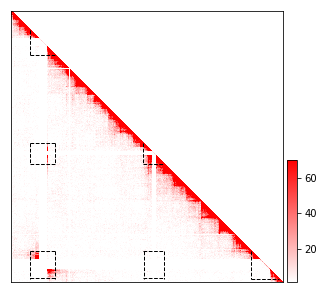

In [151]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5) )

mapc.mapC(mat2=ctumor.cmat, ax=ax, mapType='square', maxrange=70, minrange=1, symmetric=False)
from trackc import structure_mark
reload(structure_mark)
structure_mark.mark_domain(row_regions=ctumor.row_regions,
                           mark_regions=["18:47340000-50370000", "18:61140000-63630000", "18:74300000-77560000"],
                           binsize=50000, ax=ax, map_order=1, symmetric=False, only_cis=False)



# 同样能标记multi regions，只要是不同region就行

maxrange: 70 minrange: 1


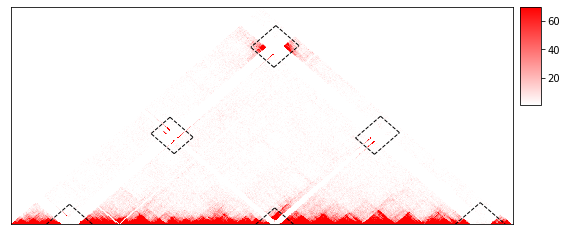

In [170]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4) )

mapc.mapC(mat=ctumor.cmat, ax=ax, mapType='triangle', maxrange=70, minrange=1, symmetric=False)
from trackc import structure_mark
reload(structure_mark)

structure_mark.mark_domain(row_regions=ctumor.row_regions, mapType="triangle",
                           mark_regions=["18:47340000-50370000", "18:61140000-63630000", "18:74300000-77560000"],
                           binsize=50000, ax=ax, map_order=0, symmetric=False)


In [6]:
aa = pd.DataFrame([[1,2,3],[4,5,6], [7,8,9]])
aa.values

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

no max min range
maxrange: 8.92 minrange: 1.08


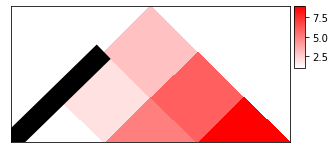

In [131]:
fig, ax = plt.subplots(1, 1, figsize=(5, 2.5) )

mapc.mapC(mat=aa.values, ax=ax, mapType='triangle', symmetric=False)

#ax.matshow(aa.values)
#x0=0-0.5
#x1=1+0.5

#ax.plot((x0,x1),(x1,x1), color='k', linewidth=20,  solid_capstyle='butt')
#ax.plot((x0,x0),(x0,x1), color='r')
#ax.plot((x0,x1),(x0,x0), color='r')

x0=0
x1=2

ax.plot((x0, x1/2),(x0, x1), color='k', linewidth=20,  solid_capstyle='butt')

In [8]:
aa

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9
